In [3]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
from woast import *
from dask.distributed import Client
import dask.array as da

In [4]:
client = Client()
client

2023-05-17 15:24:18,575 - distributed.diskutils - INFO - Found stale lock file and directory '/home/edouard/Documents/Thesis/lib/wstoa/dask-worker-space/worker-4tmdxtzk', purging
2023-05-17 15:24:18,575 - distributed.diskutils - INFO - Found stale lock file and directory '/home/edouard/Documents/Thesis/lib/wstoa/dask-worker-space/worker-77dohucb', purging
2023-05-17 15:24:18,575 - distributed.diskutils - INFO - Found stale lock file and directory '/home/edouard/Documents/Thesis/lib/wstoa/dask-worker-space/worker-kr566n01', purging
2023-05-17 15:24:18,576 - distributed.diskutils - INFO - Found stale lock file and directory '/home/edouard/Documents/Thesis/lib/wstoa/dask-worker-space/worker-3en1r6hc', purging


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 31.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40283,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 31.00 GiB
Comm: tcp://127.0.0.1:42241,Total threads: 3
Dashboard: http://127.0.0.1:39313/status,Memory: 7.75 GiB
Nanny: tcp://127.0.0.1:45095,


In [12]:
path_simu = '/media/edouard/Ultra Touch/Thesis/Data/Simu/MNH/MNH_*'
files = sorted(glob.glob(path_simu+'*.nc'))
files

['/media/edouard/Ultra Touch/Thesis/Data/Simu/MNH/MNH_CA062_202002060930_3D.nc',
 '/media/edouard/Ultra Touch/Thesis/Data/Simu/MNH/MNH_CA062_202002060930_3D_modified.nc',
 '/media/edouard/Ultra Touch/Thesis/Data/Simu/MNH/MNH_CB062_202002060930_3D.nc',
 '/media/edouard/Ultra Touch/Thesis/Data/Simu/MNH/MNH_CC062_202002062200_3D.nc',
 '/media/edouard/Ultra Touch/Thesis/Data/Simu/MNH/MNH_CS001_202002130930_3D.nc',
 '/media/edouard/Ultra Touch/Thesis/Data/Simu/MNH/MNH_CS191_202001192230_3D.nc',
 '/media/edouard/Ultra Touch/Thesis/Data/Simu/MNH/MNH_FI191_202001192230_3D.nc',
 '/media/edouard/Ultra Touch/Thesis/Data/Simu/MNH/MNH_FI211_202001212200_3D.nc',
 '/media/edouard/Ultra Touch/Thesis/Data/Simu/MNH/MNH_FL130_202002130930_3D.nc',
 '/media/edouard/Ultra Touch/Thesis/Data/Simu/MNH/MNH_GR012_202002012200_3D.nc',
 '/media/edouard/Ultra Touch/Thesis/Data/Simu/MNH/MNH_SU012_202002010939_3D.nc']

In [13]:
ds = xr.open_dataset(files[1])
ds

<xarray.Dataset>
Dimensions:  (time: 1, level: 50, nj: 1024, ni: 1024)
Coordinates:
  * level    (level) float64 508.6 548.6 588.6 ... 2.429e+03 2.469e+03 2.509e+03
  * ni       (ni) float64 0.0 40.0 80.0 120.0 ... 4.084e+04 4.088e+04 4.092e+04
  * nj       (nj) float64 0.0 40.0 80.0 120.0 ... 4.084e+04 4.088e+04 4.092e+04
  * time     (time) datetime64[ns] 2020-02-06T09:30:00
Data variables:
    PABST    (time, level, nj, ni) float32 ...
    RCT      (time, level, nj, ni) float32 ...
    RRT      (time, level, nj, ni) float32 ...
    RVT      (time, level, nj, ni) float32 ...
    THT      (time, level, nj, ni) float32 ...
    UU       (time, level, nj, ni) float64 ...
    UM       (time, level, nj, ni) float32 ...
    VM       (time, level, nj, ni) float32 ...
    WM       (time, level, nj, ni) float32 ...
Attributes:
    Conventions:                     CF-1.7 COMODO-1.4
    MNH_REAL:                        8
    MNH_INT:                         4
    MNH_REDUCE_DIMENSIONS_IN_FILES:  1
    history:                         2022-07-05T13:51:07-0000: MESONH-LXifort...
    MNH_cleanly_closed:              yes

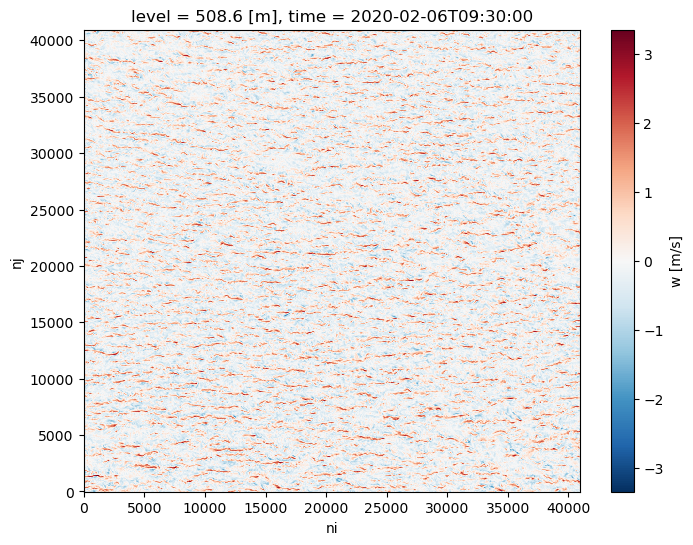

In [17]:
plt.figure(figsize=(8,6))
ds.WM[0].sel(level=100,method='nearest').plot()

In [19]:
Ntht = 4
scales = 2**np.arange(7)
xydim = ('nj','ni')

W_wst = woast(ds.WM,Ntht,scales,xydim)

In [20]:
W_wst

<xarray.Dataset>
Dimensions:  (level: 50, time: 1, theta1: 4, scale1: 7, theta2: 4, scale2: 7)
Coordinates:
  * level    (level) float64 508.6 548.6 588.6 ... 2.429e+03 2.469e+03 2.509e+03
  * time     (time) datetime64[ns] 2020-02-06T09:30:00
  * theta1   (theta1) float64 0.0 45.0 90.0 135.0
  * scale1   (scale1) int64 1 2 4 8 16 32 64
  * theta2   (theta2) float64 0.0 45.0 90.0 135.0
  * scale2   (scale2) int64 1 2 4 8 16 32 64
Data variables:
    S1       (time, level, theta1, scale1) float64 dask.array<chunksize=(1, 50, 1, 1), meta=np.ndarray>
    S2       (time, level, theta1, scale1, theta2, scale2) float64 dask.array<chunksize=(1, 50, 1, 1, 1, 1), meta=np.ndarray>
    S2n      (time, level, theta1, scale1, theta2, scale2) float64 dask.array<chunksize=(1, 50, 1, 1, 1, 1), meta=np.ndarray>

In [21]:
toto = W_wst.S2n[0,0,0,:,0,:].compute()

2023-05-17 15:36:52,770 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 7.10 GiB -- Worker memory limit: 7.75 GiB
2023-05-17 15:36:52,853 - distributed.worker_memory - WARNING - Worker is at 91% memory usage. Pausing worker.  Process memory: 7.10 GiB -- Worker memory limit: 7.75 GiB
2023-05-17 15:36:52,856 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 7.36 GiB -- Worker memory limit: 7.75 GiB
2023-05-17 15:36:52,883 - distributed.worker_memory - WARNING - Worker exceeded 95% memory budget. Restarting
2023-05-17 15:36:52,960 - distributed.worker - ERROR - Worker stream died during c

KilledWorker: ("('abs-f8b71235feb055d6cc8a9daad7d4dd6c', 0, 0, 0, 0, 0, 3)", <WorkerState 'tcp://127.0.0.1:35075', name: 2, status: closed, memory: 0, processing: 7>)

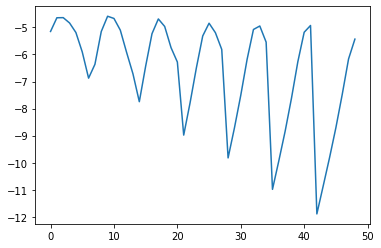

In [20]:
plt.plot(np.log2(toto.values.ravel()))

In [32]:
test = W_wst.S2n[0,0]
test

,Array,Chunk
Bytes,6.12 kiB,8 B
Shape,"(4, 7, 4, 7)","(1, 1, 1, 1)"
Count,6639 Tasks,784 Chunks
Type,float64,numpy.ndarray


In [34]:
test =  W_wst.S2n[0,0].compute()

AttributeError: 'DataArray' object has no attribute 'visualize'